## Improve computer vision accuracy with convolutions
You now know how to do fashion image recognition using a Deep Neural Network (DNN) containing three layers— the input layer (in the shape of the input data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with several parameters that influence the final accuracy, such as different sizes of hidden layers and number of training epochs.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

In [2]:
( train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images/255.0
test_images = test_images/255.0

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation = 'softmax'))



In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4976 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2483 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.23

In [7]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8777


[0.34880882501602173, 0.8776999711990356]

Your accuracy is probably about 89% on training and 87% on validation. You can make that even better using convolutions, which narrows down the content of the image to focus on specific, distinct details.

If you've ever done image processing using a filter, then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can perform operations like edge detection. For example, typically a 3x3 is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has its edges enhanced.

This is perfect for computer vision, because enhancing features like edges helps the computer distinguish one item from another. Better still, the amount of information needed is much less, because you'll train only on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers becomes more focused and possibly more accurate.

## Try the code
Run the following code. It's the same neural network as earlier, but this time with convolutional layers added first. It will take longer, but look at the impact on the accuracy:


In [8]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [9]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [10]:
# since all the images are have same dimension 
# so here its not neccessary to reshape the images but for a safe side, we do reshaping

# no of train images
print(train_images.shape)

# no of test images
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


## Gather the data
The first step is to gather the data.

You'll notice that there's a change here and the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, you have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do that, then you'll get an error when training because the convolutions do not recognize the shape.

In [11]:
train_images = train_images.reshape(60000, 28, 28,1)
test_images = test_images.reshape(10000, 28, 28,1)

# normalisation 
train_images = train_images/255.0
test_images = test_images/255.0

## Define the model
Next, define your model. Instead of the input layer at the top, you're going to add a convolutional layer. The parameters are:

* The number of convolutions you want to generate. A value like 32 is a good starting point.
* The size of the convolutional matrix, in this case a 3x3 grid.
* The activation function to use, in this case use relu.
* In the first layer, the shape of the input data.

You'll follow the convolution with a max pooling layer, which is designed to compress the image while maintaining the content of the features that were highlighted by the convolution. By specifying (2,2) for the max pooling, the effect is to reduce the size of the image by a factor of 4. It creates a 2x2 array of pixels and picks the largest pixel value, turning 4 pixels into 1. It repeats this computation across the image, and in so doing halves the number of horizontal pixels and halves the number of vertical pixels.

You can call model.summary() to see the size and shape of the network. Notice that after every max pooling layer, the image size is reduced in the following way:

In [12]:
# model creation

model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Compile and train the model
Compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
# fit the model
model.fit(train_images,train_labels,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 0.4363 - accuracy: 0.8412
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2934 - accuracy: 0.8926
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2461 - accuracy: 0.9084
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2164 - accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1896 - accuracy: 0.9287
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1653 - accuracy: 0.9382
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1445 - accuracy: 0.9449
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1281 - accuracy: 0.9520
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1129 - accuracy: 0.9570
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.09

In [16]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2904 - accuracy: 0.9139


[0.29041293263435364, 0.9139000177383423]

It's likely gone up to about 93% on the training data and 91% on the validation data.

Now try running it for more epochs—say about 20—and explore the results. While the training results might seem really good, the validation results may actually go down due to a phenomenon called overfitting.

Overfitting occurs when the network learns the data from the training set too well, so it's specialised to recognize only that data, and as a result is less effective at seeing other data in more general situations. For example, if you trained only on heels, then the network might be very good at identifying heels, but sneakers might confuse it.

Look at the code again, and see step-by-step how the convolutions were built.

## Visualize the convolutions and pooling
This code shows you the convolutions graphically. The print (test_labels[:100]) shows the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Take a look at the result of running the convolution on each and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less information, and it's perhaps finding a commonality between shoes based on that convolution and pooling combination.

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.2904 - accuracy: 0.9139
Test loss: 0.29041293263435364, Test accuracy: 91.39000177383423


In [18]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


Now you can select some of the corresponding images for those labels and render what they look like going through the convolutions. So, in the following code, FIRST_IMAGE, SECOND_IMAGE and THIRD_IMAGE are all the indexes for value 9, an ankle boot.


And you should see something like the following, where the convolution is taking the essence of the sole of the shoe, effectively spotting that as a common feature across all shoes.

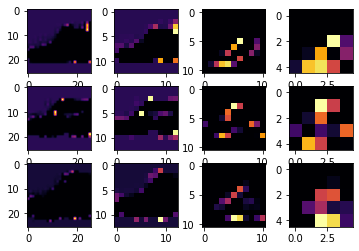

In [19]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Exercises
### Exercise 1
Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact does that have on accuracy and training time?


In [20]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.8.2
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)        

In [21]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.8.2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)        

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.8.2
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 128)        

###Exercise 2
Remove the final convolution. What impact does that have on accuracy or training time?

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

In [2]:
import numpy as np
import random

def mat(n):
  arr = []
  print(arr)
  for i in range(n):
    a = []
    for j in range(n):
      a.append(random.randint(1,100))
    arr.append(a)
  return arr

n = int(input("Enter : "))
print(mat(n))

Enter : 8
[]
[[95, 40, 19, 75, 22, 95, 25, 32], [29, 96, 38, 34, 10, 36, 26, 28], [100, 78, 81, 42, 30, 23, 7, 16], [78, 91, 56, 20, 70, 82, 32, 67], [91, 67, 91, 71, 92, 35, 84, 65], [73, 46, 40, 36, 38, 21, 77, 26], [99, 79, 80, 15, 49, 75, 72, 43], [99, 19, 68, 100, 65, 88, 92, 43]]


In [6]:
import numpy 

numpy.random.randint(1,100,(5,5))

array([[11, 34, 16, 93, 47],
       [40, 69, 75, 54, 87],
       [84, 86, 32, 48, 85],
       [93, 68, 23, 99, 79],
       [90, 47, 67, 82, 54]])

In [7]:
import numpy as np
import random

def mat(n):
  arr = np.zeros(n,dtype = int)
  print(arr)
  for i in range(n):
    # a = []
    for j in range(n):
      arr[i][j] = random.randint(1,100)
      # a.append(random.randint(1,100))
    # arr.append(a)
  return arr

n = int(input("Enter : "))
print(mat(n))

Enter : 5
[0 0 0 0 0]


TypeError: ignored

In [4]:
n = int(input("Enter the limit : "))
print(f"The limit is n : {n}")
l=[]
for i in range(2,n+1):
    count = 0
    for j in range(1,i+1):
      if i%j == 0:
        count = count+1
    if count == 2:
      l.append(i)
print(l)

Enter the limit : 200
The limit is n : 200
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]
